This Jupyter notebook loads the raw amplitude and Mel spectrogram data files as numpy arrays.

Download the data files [here](https://console.cloud.google.com/storage/browser/cs181_practical_data).  This notebook assumes that the data files as located in the same directory.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Load raw amplitude data.

In [4]:
# Load train data

X_amp_train = np.load("data/Xtrain_amp.npy")
y_amp_train = np.load("data/ytrain_amp.npy")

In [13]:
X_amp_train.shape

(5553, 44100)

In [5]:
# Load test data

X_amp_test = np.load("data/Xtest_amp.npy")
y_amp_test = np.load("data/ytest_amp.npy")

In [15]:
X_amp_test.shape

(2197, 44100)

### Load Mel spectrogram data.

In [6]:
# Load train data

X_mel_train = np.load("data/Xtrain_mel.npy")
y_mel_train = np.load("data/ytrain_mel.npy")

In [17]:
X_mel_train.shape

(5553, 128, 87)

In [18]:
# Flatten X_mel_train's spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_train_flat.shape

(5553, 11136)

In [7]:
# Load test data

X_mel_test = np.load("data/Xtest_mel.npy")
y_mel_test = np.load("data/ytest_mel.npy")

In [6]:
X_mel_test[0]

array([[1.7437781e-01, 8.2188599e-02, 6.0837075e-02, ..., 9.1910191e-02,
        9.4967283e-02, 1.9559012e-01],
       [7.0797458e-02, 1.7632801e-02, 2.6656395e-05, ..., 2.0950911e-05,
        6.2276116e-03, 3.6030050e-02],
       [7.4844457e-02, 2.7433863e-02, 2.4397497e-03, ..., 1.3756391e-03,
        4.9841995e-03, 1.4264228e-02],
       ...,
       [5.3774829e-06, 1.3443675e-06, 3.0903109e-14, ..., 4.1203250e-14,
        1.5509233e-05, 9.5885647e-05],
       [5.2936280e-06, 1.3234036e-06, 1.9879338e-14, ..., 3.6426923e-14,
        1.5248110e-05, 9.4271250e-05],
       [5.2392279e-06, 1.3098039e-06, 1.9155037e-14, ..., 5.0148362e-14,
        1.5080436e-05, 9.3234616e-05]], dtype=float32)

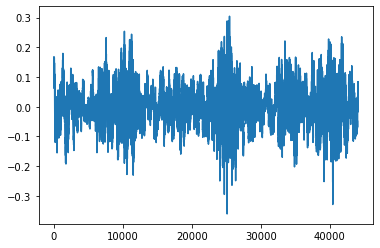

In [13]:
plt.plot(X_amp_train[1])

## PCA and Logistic Regression

In [27]:
class PCA(object):
    # d is the number of principal components
    def __init__(self, d):
        self.d = d
        self.data = None
        self.mean = None
        self.standardized = None
        self.PCs = None
        self.eigenvalues = None

    # X is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images. This method should apply PCA to a dataset X.
    def apply(self, X):
        # save the data
        self.data = X
        # subtract the mean from the data
        self.mean = np.mean(X, axis = 0)
        mean_subtracted = np.subtract(X, self.mean)
        self.standardized = np.matrix([i.flatten('C') for i in mean_subtracted]).T
        #self.cov = 1/ self.standardized.shape[0] * np.matmul(self.standardized.T,self.standardized)
        u, s, v = np.linalg.svd(self.standardized)
        self.PCs = u
        self.eigenvalues = np.square(s).T
    

In [28]:
pca = PCA(d = 500)
pca.apply(X_mel_train)

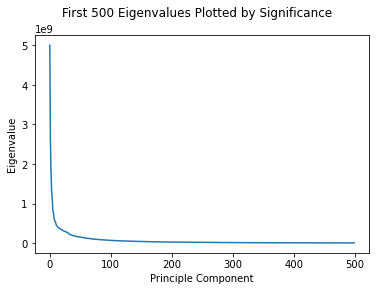

In [29]:
plt.plot(np.arange(pca.d), pca.eigenvalues[0:pca.d])
plt.suptitle("First 500 Eigenvalues Plotted by Significance")
plt.xlabel("Principle Component")
plt.ylabel("Eigenvalue")
plt.show()

In [31]:
pca.eigenvalues

array([5.0056622e+09, 2.6428508e+09, 1.7959492e+09, ..., 8.9868045e-08,
       7.5257702e-08, 5.9456099e-08], dtype=float32)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in log
  


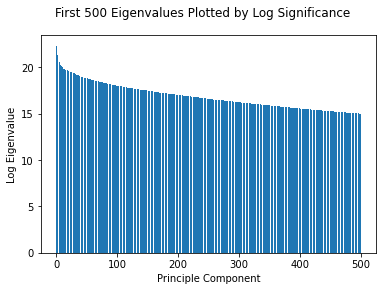

In [19]:
plt.figure()
plt.bar(np.arange(pca.d), np.log(pca.eigenvalues[0:pca.d]))
plt.suptitle("First 500 Eigenvalues Plotted by Log Significance")
plt.xlabel("Principle Component")
plt.ylabel("Log Eigenvalue")
plt.show()

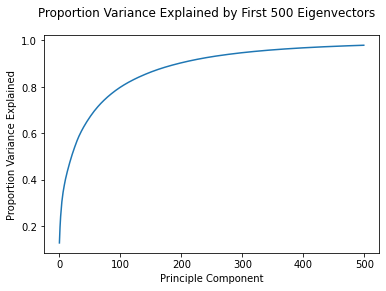

Proportion variance explained by first 500 PC's: 0.9792717695236206
Variance explained by first 500 PC's: 38119579648.0


In [20]:
explained = np.cumsum(np.divide(pca.eigenvalues,np.sum(pca.eigenvalues)))
plt.figure()
plt.plot(np.arange(pca.d), explained[:pca.d])
plt.suptitle("Proportion Variance Explained by First 500 Eigenvectors")
plt.xlabel("Principle Component")
plt.ylabel("Proportion Variance Explained")
plt.show()

print("Proportion variance explained by first 500 PC's: {}".format(explained[499]))
print("Variance explained by first 500 PC's: {}".format(np.sum(pca.eigenvalues[:500])))

In [10]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [ ]:
pcamel = PCA(n_components=500)
pcamel.fit(X_mel_train)

In [44]:
pca = PCA(n_components=500)
pca.fit(X_amp_train_c)

PCA(n_components=500)

In [40]:
X_amp_train_c = X_amp_train/ np.sum(X_amp_train, axis =0)
X_amp_test_c = X_amp_train/np.sum(X_amp_test, axis =0)

In [59]:
pca = PCA(n_components=500)
pca.fit(X_amp_train)

PCA(n_components=500)

In [60]:
#Transforming x_train and x_test 
x_train_pca = pca.transform(X_amp_train)
x_test_pca = pca.transform(X_amp_test)

#Add constant to x_train and x_test
x_train_pca_cst = sm.add_constant(x_train_pca)
x_test_pca_cst = sm.add_constant(x_test_pca)

In [63]:
#Training
model = LogisticRegression(C=1000000).fit(x_train_pca_cst, y_amp_train)

#Predict
y_pred_train = model.predict(x_train_pca_cst)
y_pred_test = model.predict(x_test_pca_cst)

#Perfromance Evaluation
train_score = accuracy_score(y_amp_train, y_pred_train)*100
test_score = accuracy_score(y_amp_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 41.9412929947776%
Testing Set Accuracy: 18.43422849340009%


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
X_mel_train_reshape = np.reshape(X_mel_train, (X_mel_train.shape[0], X_mel_train.shape[1] * X_mel_train.shape[2]))
                                 
X_mel_test_reshape = np.reshape(X_mel_test, (X_mel_test.shape[0], X_mel_test.shape[1] * X_mel_test.shape[2]))                              

In [42]:
pca = PCA(n_components=500)
pca.fit(X_mel_train_reshape)

PCA(n_components=500)

In [25]:
y_mel_test[2]

2

In [43]:
#Transforming x_train and x_test 
x_train_pca = pca.transform(X_mel_train_reshape)
x_test_pca = pca.transform(X_mel_test_reshape)

#Add constant to x_train and x_test
x_train_pca_cst = sm.add_constant(x_train_pca)
x_test_pca_cst = sm.add_constant(x_test_pca)



In [45]:
#Training
model = LogisticRegression(C=100000).fit(x_train_pca_cst, y_mel_train)

#Predict
y_pred_train = model.predict(x_train_pca_cst)
y_pred_test = model.predict(x_test_pca_cst)

#Perfromance Evaluation
train_score = accuracy_score(y_mel_train, y_pred_train)*100
test_score = accuracy_score(y_mel_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 58.90509634431839%
Testing Set Accuracy: 32.45334547109695%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [66]:
X = X_mel_train
K = 10

In [67]:
N = X.shape[0]
centroids = X[np.random.choice(N, K, replace = False), :, :]

In [71]:
centroids[0].shape

(128, 87)

# KMeans

In [18]:
class Phil_KMeans(object):
    # K is the K in KMeans
    def __init__(self, K):
        self.K = K
    
    def __make_one_hot(self, array):
        one_hot = np.zeros(array.shape)
        min_pos = np.array([np.argmin(row) for row in array])
        one_hot[np.arange(array.shape[0]), min_pos] = 1
        return one_hot 

    def __distance(self, p1, p2):
        # calulate the l2 distance between points, i.e. euclidean
        # each is a 1xD matrix
        return sum(pow(p1-p2, 2))
       
    # X is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images.
    def fit(self, X):
        # 1 Find the cluster centers (cluster mean)
        def cluster_mean(resp, data):
            # for each datapoint in cluster c,
            # sum it's vals and divide by number in class
            class_sums = np.zeros((resp.shape[1], data.shape[1]))
            for point, res in zip(data, resp):
                class_sums[np.argmax(res)] += point
            # count up the number of datapoints in each class    
            class_counts = np.sum(resp, axis=0)
            
            # class_mean = np.divide(class_sums, class_counts)
            class_mean = []
            for class_sum, class_count in zip(class_sums, class_counts):
                class_mean.append(np.divide(class_sum, class_count))
                
            class_mean = np.array(class_mean)
            return class_mean 

        # 2 adjust reponsibility vectors
        def adjust_resp(mu, data):
            # resp dims: NxC
            # mu dims:
            positions = []
            for point in data:
                distances = []
                for class_mean in mu:
                    distances.append(self.__distance(class_mean, point))
                one_ht = np.zeros(mu.shape[0])
                one_ht[np.argmin(distances)] = 1
                positions.append(one_ht)
                
            return np.array(positions)

        # 3 calculate the loss
        def loss_func(data, mu, resp):
            loss_list = []
            # Loop through each datapoint in the dataset
            for datapoint, res in zip(data, resp):
                cluster = np.argmax(res)
                loss_list.append(self.__distance(datapoint, mu[cluster]))
            return sum(loss_list)

        # initialisation of cluster asignment i.e. responsibility vectors
        self.resp = self.__make_one_hot(np.random.randn(X.shape[0], self.K))
        # Set inital mu
        self.mu = np.random.randn(self.K, X.shape[1])
        self.loss_list = []

        # record the losses at each epoch
        converge = False
        epoch = 0
        while not converge:
            # 1 calc the mean of the clusters
            self.mu = cluster_mean(self.resp, X)
            
            # 2 Calc the loss
            current_loss = loss_func(X, self.mu, self.resp)

            # 3 adjust the responsibility vectors
            new_resp = adjust_resp(self.mu, X)
            if np.array_equal(new_resp, self.resp):
                converge = True
            self.resp = new_resp
            epoch += 1
            self.loss_list.append(current_loss)
            print("Epoch:", epoch)


In [15]:
class KMeans_(object):
    # K is the K in KMeans
    def __init__(self, K):
        self.K = K

    def fit(self, X, scale = False):
        self.X = X
        
        if scale:
            mean = np.mean(X, keepdims = True, axis = 0)
            std = np.std(X, keepdims = True, axis = 0)
            std[std == 0] = 1
            X = (X - mean)/std
            
        N = X.shape[0]
        centroids = X[np.random.choice(N, self.K, replace = False), :, :]
        
        #wht is this
        if scale:
            centroids = np.array([np.random.normal(0,1,X_mel_train.shape[1]*X_mel_train.shape[2]).reshape(X_mel_train.shape[1],X_mel_train.shape[2]) for i in range(self.K)])

        distances = np.zeros([N, self.K])
        prev = np.zeros(N)
        
        self.mse_temp = []
        self.num_different_temp = []
         
        count = 0
        stop = False
        while not stop:
            count += 1
            for k in range(self.K):

                distances[:, k] = np.ravel(np.apply_over_axes(np.mean, (X - centroids[k,:,:])**2, (1,2)))
            
            new_cluster = np.apply_along_axis(np.argmin, 1, distances)
            
            #column wise 
            self.mse_temp.append(np.mean(np.apply_along_axis(np.min, 1, distances)))
                        
            #how know when to stop????
            stop = np.array_equal(new_cluster, prev)
            if stop:
                break

            prev = new_cluster
            for k in range(self.K):
                centroids[k,:,:] = np.apply_along_axis(np.mean, 0, X[new_cluster == k,:,:])
                            
        self.clusters = new_cluster
        self.centroids = centroids

    def predict(self, arr):
            pass

In [22]:
xflat = X_mel_train.reshape(X_mel_train.shape[0], -1)

In [23]:
# P's Classifier
pkm = Phil_KMeans(K=10)
pkm.fit(xflat)

Epoch: 1
Epoch: 2


KeyboardInterrupt: 

In [17]:
km.clusters.shape

(5553,)

In [ ]:
# N's Classifier
km = KMeans_(K=10)
km.fit(X_mel_train, True)

In [16]:


# KMeansClassifier.centroids.shape
print(accuracy_score(KMeansClassifier.clusters, y_mel_train))

NameError: name 'KMeansClassifier' is not defined

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score



kmeans = KMeans(n_clusters=10)
kmeans.fit(X_amp_train)
y_pred = kmeans.predict(X_amp_train)

print(accuracy_score(y_amp_train, y_pred))

0.12605798667386997


In [ ]:
def predict_knn(k=1):
    """Returns predictions using KNN predictor with the specified k."""
    # TODO: your code here
    y_pred_list = []
    
    for value in df.itertuples():
        x = np.array([value[1], value[2]])
        alt_data = list(df[["x1", "x2", "y"]][:value[0]].append( df[["x1", "x2","y"]][value[0]+1:], ignore_index=True).to_records(index=False))
        y_pred_list.append(knn_regression(k, x, alt_data))
        
    return pd.Series(y_pred_list)

## Random Forests

In [64]:
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [65]:
depth, tree_start, tree_end = {}, 5, 10
for i in range(tree_start, tree_end):
    model = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=model, X=X_amp_train, y=y_amp_train, cv=5, n_jobs=-1)
    depth[i] = scores.mean()

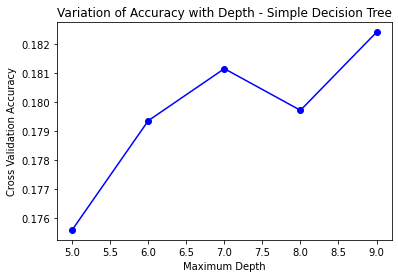

In [66]:
lists = sorted(depth.items())
x, y = zip(*lists) 
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Maximum Depth")
plt.title('Variation of Accuracy with Depth - Simple Decision Tree')
plt.plot(x, y, 'b-', marker='o')
plt.show()

In [67]:
best_depth = sorted(depth, key=depth.get, reverse=True)[0]
print("The best depth was found to be:", best_depth)

The best depth was found to be: 9


In [68]:
model = DecisionTreeClassifier(max_depth=best_depth)
model.fit(X_amp_train, y_amp_train)

#Check Accuracy of Spam Detection in Train and Test Set
print("Accuracy, Training Set: {:.2%}".format(accuracy_score(y_amp_train, model.predict(X_amp_train))))
print("Accuracy, Testing Set: {:.2%}".format(accuracy_score(y_amp_test, model.predict(X_amp_test))))



Accuracy, Training Set: 46.12%
Accuracy, Testing Set: 19.44%


In [71]:
pd.crosstab(y_amp_test, model.predict(X_amp_test), margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,56,1,61,10,21,60,0,32,26,33,300
1,4,0,4,0,6,7,0,7,3,8,39
2,43,2,112,57,12,28,0,8,20,17,299
3,30,2,57,45,13,23,2,15,22,20,229
4,30,3,52,11,41,25,4,28,29,41,264
5,62,2,33,7,10,73,3,31,19,24,264
6,4,0,7,14,0,1,0,1,2,1,30
7,27,7,38,16,28,37,1,32,26,24,236
8,26,2,65,50,13,11,4,14,33,18,236


## Tune Hyperparameters


#### Bagging

In [ ]:
#Creating model
np.random.seed(0)
model = DecisionTreeClassifier(max_depth=5) # we tried a variety of depths here

#Initializing variables
n_trees = 100 # we tried a variety of numbers here
predictions_train = np.zeros((data_train.shape[0], n_trees))
predictions_test = np.zeros((data_test.shape[0], n_trees))

#Conduct bootstraping iterations
for i in range(n_trees):
    temp = data_train.sample(frac=1, replace=True)
    response_variable = temp['Spam']
    temp = temp.drop(['Spam'], axis=1)
    model.fit(temp, response_variable)  
    predictions_train[:,i] = model.predict(x_train)   
    predictions_test[:,i] = model.predict(x_test)
    
#Make Predictions Dataframe
columns = ["Bootstrap-Model_"+str(i+1) for i in range(n_trees)]
predictions_train = pd.DataFrame(predictions_train, columns=columns)
predictions_test = pd.DataFrame(predictions_test, columns=columns)